# TASK : BUILD AND DEPLOY AN IMAGE CLASSIFICATION MODEL

## Fashion MNIST Image Classification

### DATASET


#### Here I have selected Fashion MNIST(Clothing classification dataset)

### PART 01: DATA PREPROCESSING

#### Loading Dataset & Performing EDA

In [11]:
from sklearn.model_selection import train_test_split

# Load dataset from CSV
import pandas as pd
train_df = pd.read_csv("C:/Users/Hp/Desktop/fashion-mnist_train.csv")
test_df = pd.read_csv("C:/Users/Hp/Desktop/fashion-mnist_train.csv")

# Separate labels and pixel values
y_train = train_df.iloc[:, 0].values  # First column = labels
X_train = train_df.iloc[:, 1:].values  # Remaining columns = pixel values

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

# Reshape to 28x28 grayscale
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Correct train-validation split (with stratification)
X_train_fixed, X_val_fixed, y_train_fixed, y_val_fixed = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Training Data Shape:", X_train_fixed.shape)
print("Validation Data Shape:", X_val_fixed.shape)
print("Training Labels Shape:", y_train_fixed.shape)
print("Validation Labels Shape:", y_val_fixed.shape)


Training Data Shape: (48000, 28, 28, 1)
Validation Data Shape: (12000, 28, 28, 1)
Training Labels Shape: (48000,)
Validation Labels Shape: (12000,)


In [12]:
import tensorflow as tf
import numpy as np

# Convert grayscale (1-channel) to RGB (3-channel)
X_train_rgb = np.repeat(X_train_fixed, 3, axis=-1)  # Convert (28,28,1) → (28,28,3)
X_val_rgb = np.repeat(X_val_fixed, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Resize images to 32x32 for MobileNetV2
X_train_resized = tf.image.resize(X_train_rgb, (32, 32)).numpy()
X_val_resized = tf.image.resize(X_val_rgb, (32, 32)).numpy()
X_test_resized = tf.image.resize(X_test_rgb, (32, 32)).numpy()

print("Resized Training Data Shape:", X_train_resized.shape)
print("Resized Validation Data Shape:", X_val_resized.shape)
print("Resized Testing Data Shape:", X_test_resized.shape)


Resized Training Data Shape: (48000, 32, 32, 3)
Resized Validation Data Shape: (12000, 32, 32, 3)
Resized Testing Data Shape: (60000, 32, 32, 3)


#### Checking Label Distribution Again

In [13]:
import numpy as np

# Check label distribution
unique_labels, counts = np.unique(y_train_fixed, return_counts=True)
print("Training Labels Distribution:", dict(zip(unique_labels, counts)))

unique_labels, counts = np.unique(y_val_fixed, return_counts=True)
print("Validation Labels Distribution:", dict(zip(unique_labels, counts)))

unique_labels, counts = np.unique(y_test, return_counts=True)
print("Testing Labels Distribution:", dict(zip(unique_labels, counts)))


Training Labels Distribution: {0: 4800, 1: 4800, 2: 4800, 3: 4800, 4: 4800, 5: 4800, 6: 4800, 7: 4800, 8: 4800, 9: 4800}
Validation Labels Distribution: {0: 1200, 1: 1200, 2: 1200, 3: 1200, 4: 1200, 5: 1200, 6: 1200, 7: 1200, 8: 1200, 9: 1200}
Testing Labels Distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


#### Checking If Images Match Labels

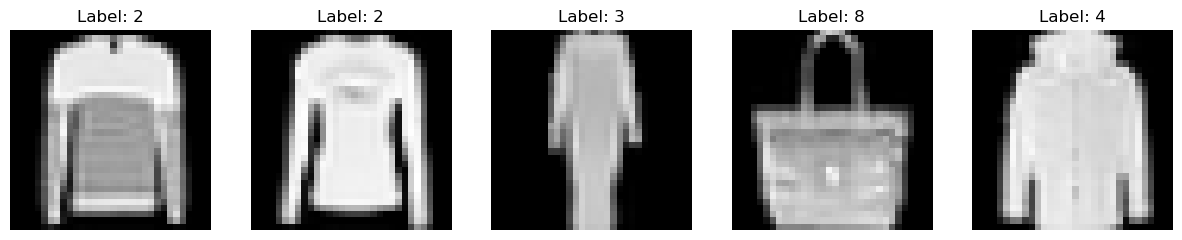

In [14]:
import matplotlib.pyplot as plt

# Select 5 random samples
indices = np.random.choice(len(X_train_resized), 5, replace=False)

# Plot images and labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, index in enumerate(indices):
    axes[i].imshow(X_train_resized[index])
    axes[i].set_title(f"Label: {y_train_fixed[index]}")
    axes[i].axis("off")
plt.show()


### PART:02 MODEL TRAINING AND EVALUATION

#### Choosing a Pretrained CNN Model
#### We will use MobileNetV2
#### Loading MobileNetV2 Model

In [15]:
history = model.fit(X_train_resized, y_train_fixed,
                    epochs=10,
                    validation_data=(X_val_resized, y_val_fixed),
                    batch_size=32,
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 497s 299ms/step - accuracy: 0.6703 - loss: 0.9190 - val_accuracy: 0.1000 - val_loss: 2.3446 - learning_rate: 5.0000e-05
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 402s 267ms/step - accuracy: 0.7589 - loss: 0.6785 - val_accuracy: 0.1000 - val_loss: 2.4500 - learning_rate: 5.0000e-05
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 402s 268ms/step - accuracy: 0.7911 - loss: 0.5818 - val_accuracy: 0.1184 - val_loss: 2.5193 - learning_rate: 5.0000e-05
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 411s 274ms/step - accuracy: 0.8257 - loss: 0.4890 - val_accuracy: 0.7400 - val_loss: 0.8616 - learning_rate: 2.5000e-05
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 409s 273ms/step - accuracy: 0.8360 - loss: 0.4549 - val_accuracy: 0.8376 - val_loss: 0.4381 - learning_rate: 2.5000e-05
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 403s 269ms/step - accuracy: 0.8469 - loss: 0.4270 - val_accuracy: 0.8441 - val_loss: 0.4232 - learning_rate: 2.5000e-05
Epoch 7/10
1500/1500 ━━━━━━━

### Evaluating the Model on Test Set

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 225s 97ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6000
           1       0.99      0.98      0.98      6000
           2       0.83      0.83      0.83      6000
           3       0.85      0.94      0.89      6000
           4       0.80      0.83      0.81      6000
           5       0.96      0.98      0.97      6000
           6       0.75      0.66      0.71      6000
           7       0.96      0.94      0.95      6000
           8       0.98      0.97      0.98      6000
           9       0.97      0.97      0.97      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



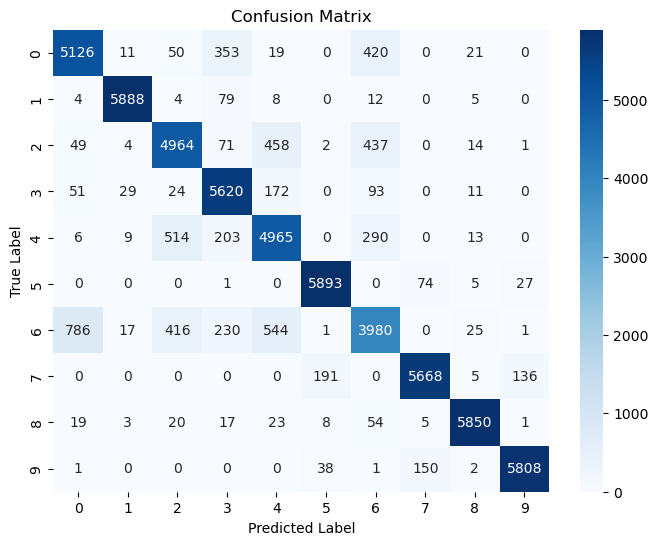

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on test set
y_pred = np.argmax(model.predict(X_test_resized), axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Saving the Model

In [18]:
model.save("fashion_mnist_mobilenet_model.keras")
print("Model saved successfully as .keras!")

Model saved successfully as .keras!
